<a href="https://colab.research.google.com/github/lmcdo/Flutter-Listview-Tutorial/blob/master/week2_SkikitLearn_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 7)

df = web.DataReader("ECOL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,60.700001,60.000000,60.259998,60.570000,62700.0,60.570000
2019-09-03,61.000000,59.970001,60.209999,60.610001,74800.0,60.610001
2019-09-04,61.380001,60.459999,61.009998,61.040001,42900.0,61.040001
2019-09-05,62.349998,61.400002,61.509998,61.730000,85300.0,61.730000
2019-09-06,62.250000,61.669998,61.959999,61.740002,50000.0,61.740002


In [34]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail()



Date
2019-08-30    59.912334
2019-09-03    59.936387
2019-09-04    59.964441
2019-09-05    59.993331
2019-09-06    60.020731
Name: Adj Close, dtype: float64

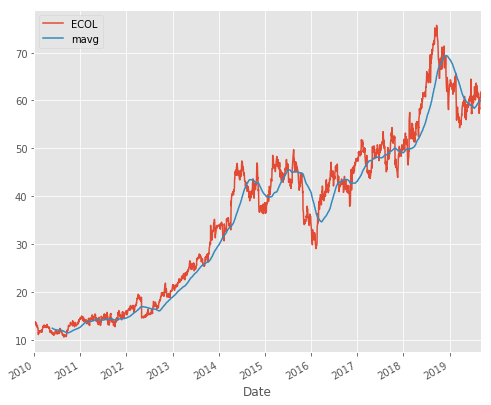

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='ECOL')
mavg.plot(label='mavg')
plt.legend()

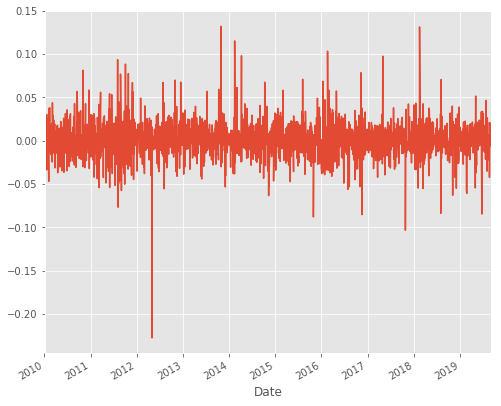

In [36]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [0]:
import pandas_datareader.data as web 
dfcomp = web.DataReader(['ECOL','FE', 'NEE', 'EXC', 'AEE'],'yahoo',start=start,end=end)['Adj Close']

In [38]:
dfcomp.tail()

Symbols,AEE,ECOL,EXC,FE,NEE
Date,,,,,
2019-08-30,77.150002,60.570000,47.259998,46.000000,219.080002
2019-09-03,78.489998,60.610001,47.919998,46.540001,225.559998
2019-09-04,78.489998,61.040001,48.000000,46.840000,224.119995
2019-09-05,77.139999,61.730000,48.119999,46.520000,219.809998
2019-09-06,76.190002,61.740002,48.119999,46.680000,220.139999


In [39]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr.tail()

Symbols,AEE,ECOL,EXC,FE,NEE
Symbols,,,,,
AEE,1.000000,0.197331,0.644658,0.624967,0.726630
ECOL,0.197331,1.000000,0.150586,0.145137,0.193031
EXC,0.644658,0.150586,1.000000,0.642988,0.627985
FE,0.624967,0.145137,0.642988,1.000000,0.607530
NEE,0.726630,0.193031,0.627985,0.607530,1.000000


Text(0, 0.5, 'Returns NEE')

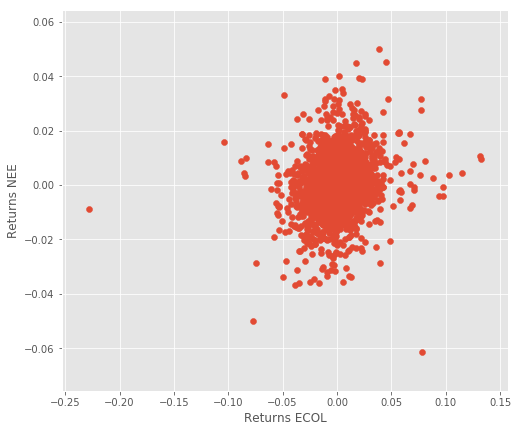

In [44]:

plt.scatter(retscomp.ECOL, retscomp.NEE)
plt.xlabel('Returns ECOL')
plt.ylabel('Returns NEE')

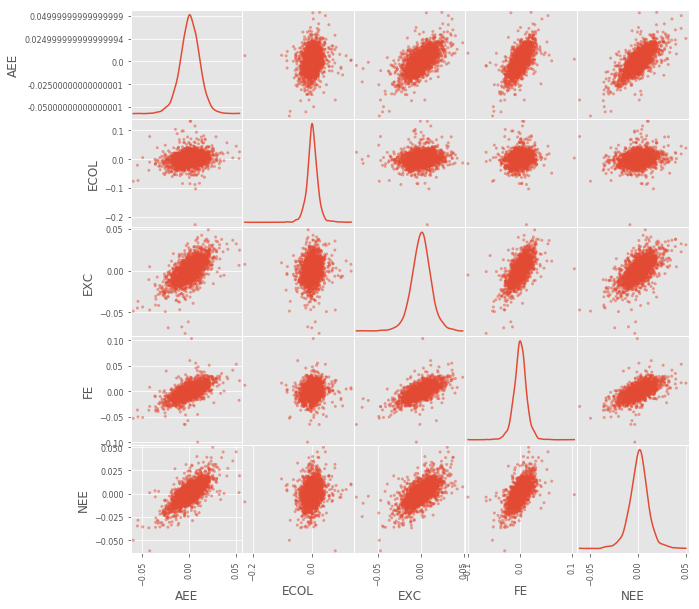

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

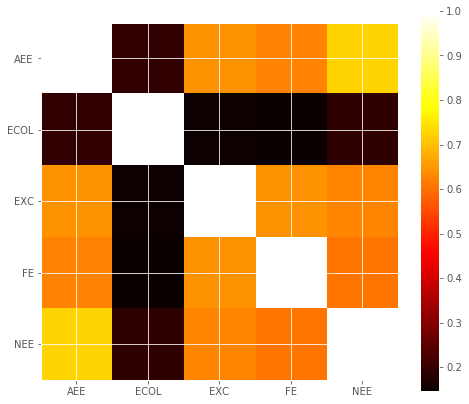

In [43]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

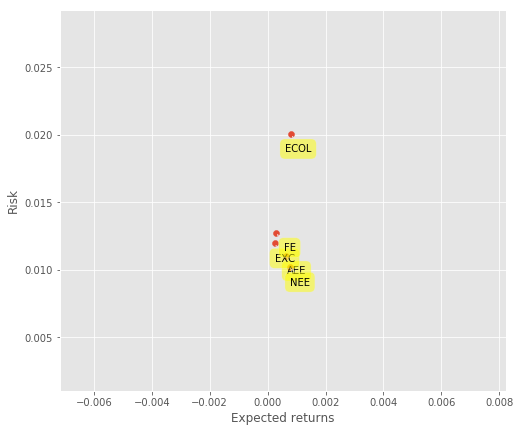

In [45]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [51]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-08-30,60.570000,62700.0,1.155689,0.514440
2019-09-03,60.610001,74800.0,1.699388,0.664344
2019-09-04,61.040001,42900.0,1.507212,0.049177
2019-09-05,61.730000,85300.0,1.538955,0.357667
2019-09-06,61.740002,50000.0,0.939426,-0.355064


In [0]:
import math
import numpy as np
from sklearn import preprocessing
dfreg.fillna(value=-9999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_col = 'Adj Close'
X = np.array(dfreg.drop(['label'], 1))

dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = preprocessing.scale(X)
Xlately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [0]:
from sklearn.model_selection import train_test_split
X_train=X[:1300]
y_train=y[:1300]
X_test=X[1300:]
y_test=y[1300:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0 )



In [81]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [82]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)



In [87]:
print ("the linear regression confidence is ", confidencereg)
print ("the quadratic regression 2 confidence is ",confidencepoly2)
print ("the quadratic regression 3 confidence is ",confidencepoly3)
print ("the knn regression confidence is ",confidenceknn)

the linear regression confidence is  0.9610205477923788
the quadratic regression 2 confidence is  0.9613590671939682
the quadratic regression 3 confidence is  0.9606269624863364
the knn regression confidence is  0.9159218095349635


In [95]:
forecast_set = clfknn.predict(Xlately)
forecast_set




array([64.95824051, 62.61055756, 59.03980637, 57.86034203, 57.43776131,
       60.28747749, 62.43964005, 58.23582458, 62.90538216, 60.07916641,
       63.00371742, 66.63916206, 60.30329704, 60.94257164, 59.84402084,
       55.016119  , 57.66412544, 54.56786537, 59.632761  , 60.39402008,
       60.11829948, 65.03676224, 64.91992378, 65.3785305 , 65.66290665])

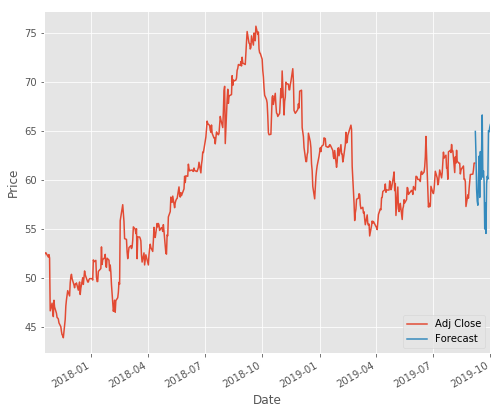

In [96]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()